In [ ]:
!git clone https://github.com/geneexpressionpolito/Transformers-for-gene-expression-prediction-from-raw-dna-sequences.git
!mv ./Transformers-for-gene-expression-prediction-from-raw-dna-sequences/Classes ./

In [ ]:
!pip install import-ipynb
import import_ipynb

In [ ]:
!gdown --folder 1u34ntvh4dL5Y5_hZSA9EDs5SZ32MPda1

In [4]:
from Classes.DataManager import DataManager
from Classes.CNN1D import projCNN1D
from tensorflow import keras
import numpy as np

%load_ext tensorboard

importing Jupyter notebook from /content/drive/MyDrive/Bionformatics_Project/Colab/Classes/DataManager.ipynb
importing Jupyter notebook from /content/drive/MyDrive/Bionformatics_Project/Colab/Classes/CNN1D.ipynb
Populating the interactive namespace from numpy and matplotlib


data loading takes at most 17s

In [5]:
dm = DataManager(transformer=False, micro=False)
X_trainhalflife, X_trainpromoter, y_train, _, _                 = dm.get_train(True, False, False)
X_validationhalflife, X_validationpromoter, y_validation, _, _  = dm.get_validation(True, False, False)
X_testhalflife, X_testpromoter, y_test, _, _                    = dm.get_test(True, False, False)

Preprocessing-> Padding

In [6]:
leftpos  = 3_000          #3_000 
rightpos = 13_500         #13_500

maxlen   = rightpos-leftpos
print("maxlen: ",maxlen)

maxlen:  10500


In [7]:
X_trainpromoter_p      = X_trainpromoter[:, leftpos:rightpos]
X_validationpromoter_p = X_validationpromoter[:, leftpos:rightpos]
X_testpromoter_p       = X_testpromoter[:, leftpos:rightpos]

INFO:tensorflow:Initializing the TPU system: grpc://10.17.114.226:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.17.114.226:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU')]
INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


(None, 2000, 4)
model built
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 10500, 4)]   0                                            
__________________________________________________________________________________________________
tf.__operators__.getitem_1 (Sli (None, 1050, 4)      0           input_1[0][0]                    
__________________________________________________________________________________________________
tf.__operators__.getitem_2 (Sli (None, 1050, 4)      0           input_1[0][0]                    
__________________________________________________________________________________________________
tf.__operators__.getitem_3 (Sli (None, 1050, 4)      0           input_1[0][0]                    
__________________________________________________________________

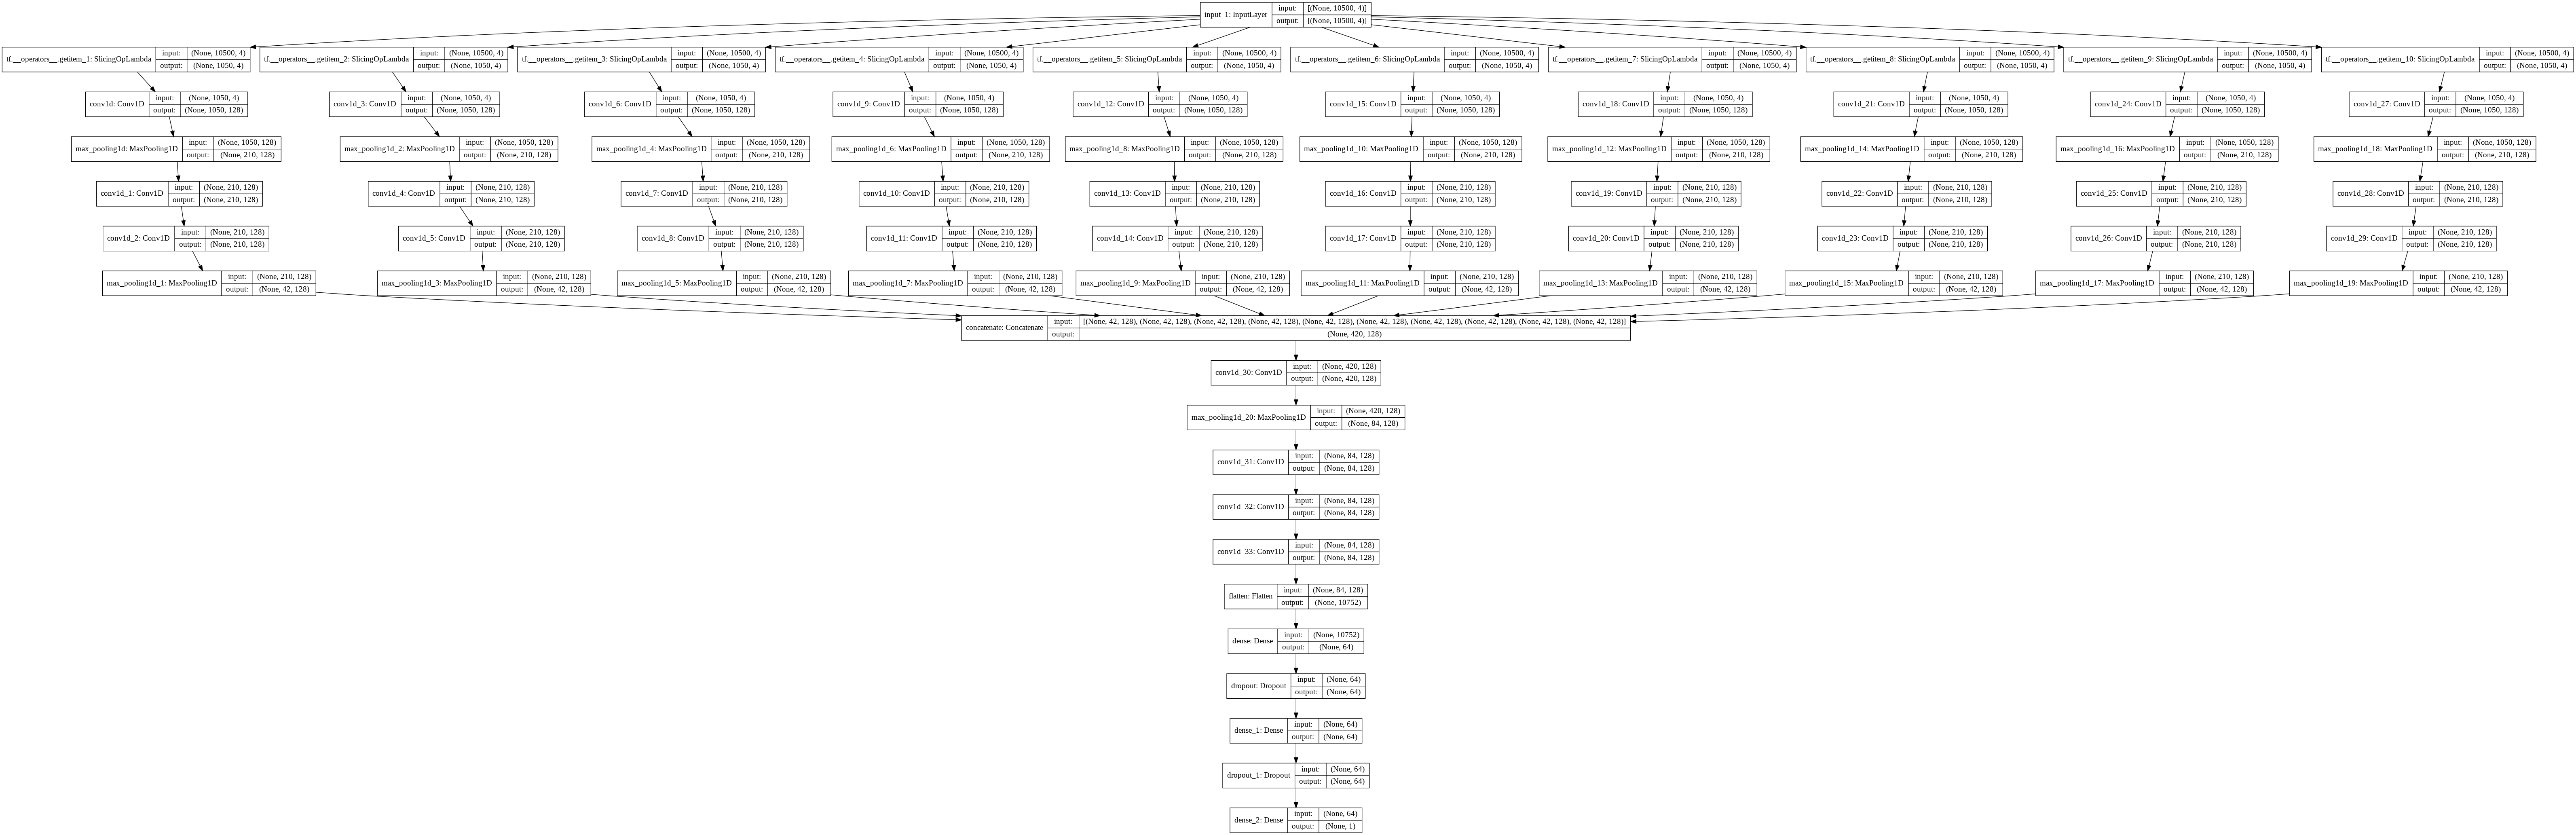


Parameters:
{'checkpoint_dir': 'DivideEtImpera/', 'model_type': 'DivideEtImpera_onlyPromo', 'n_epochs': 300, 'batch_size': 256, 'learning_rate': 0.001, 'momentum': 0.9, 'CNN_input': (10500, 4), 'miRNA_input': (2064,), 'dropout_rate': 0.5, 'lr_reduction_epoch': 70, 'shuffle': True, 'logdir': None, 'patience': 15, 'opt': 'SGD', 'loss': 'mse', 'history': '', 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7f604939a950>}



In [8]:
# # Clear any logs from previous runs
# !rm -rf ./logs/tritacarne_0-006/
# maxlen=2000
model_type="DivideEtImpera_onlyPromo"
checkpoint_dir="DivideEtImpera/"
logdir = None
loss = "mse" # "mae" "mean_squared_logarithmic_error" "mse"

######################################################################################################################
import tensorflow as tf
tf.keras.backend.clear_session()

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

strategy = tf.distribute.experimental.TPUStrategy(resolver)


with strategy.scope():
    net = projCNN1D(checkpoint_dir=checkpoint_dir, model_type=model_type, n_epochs=300, batch_size=256, lr_reduction_epoch=70,
                learning_rate=1e-3, CNN_input=(maxlen, 4), dropout_rate=0.5, logdir=logdir, momentum=0.9, patience=15, opt="SGD", loss=loss)
    
########################################################################################################################

Epoch 1/300

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 16s 104ms/step - loss: 0.9988 - val_loss: 1.0176
Epoch 2/300

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 2s 31ms/step - loss: 0.9979 - val_loss: 1.0174
Epoch 3/300

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 2s 31ms/step - loss: 0.9960 - val_loss: 1.0131
Epoch 4/300

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 2s 31ms/step - loss: 0.9913 - val_loss: 1.0069
Epoch 5/300

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 2s 31ms/step - loss: 0.9807 - val_loss: 0.9900
Epoch 6/300

Epoch 00006: LearningRateScheduler reducing learning rate to

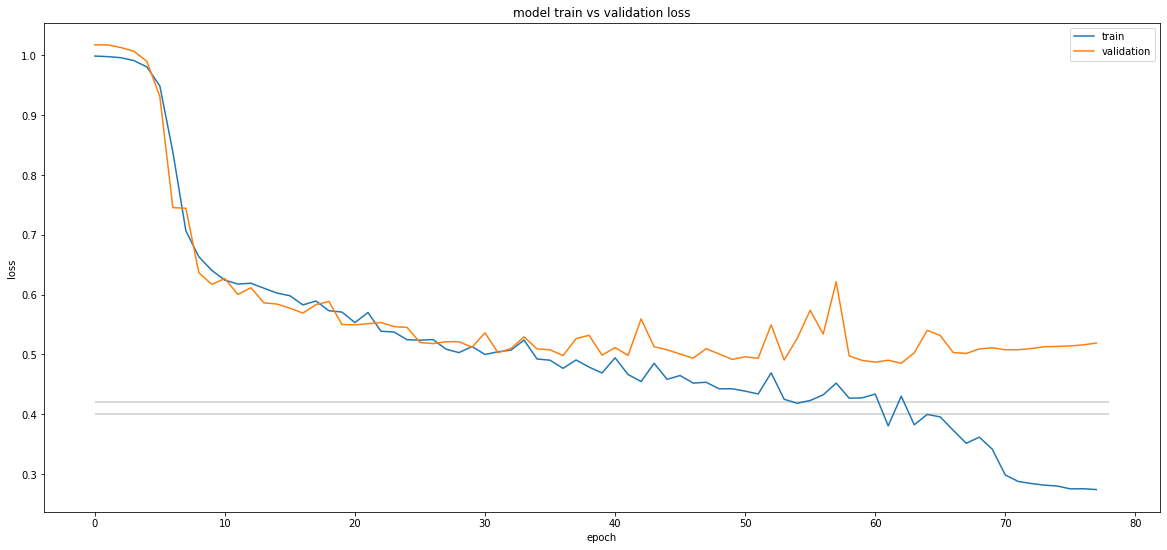

In [9]:
net.train_model([X_trainpromoter_p], y_train, [X_validationpromoter_p], y_validation, TPU=True)

In [10]:
net.evaluate([X_testpromoter_p], y_test)

Test R^2 = 0.549


0.54943789040583

In [11]:
net.evaluate_best([X_testpromoter_p], y_test, TPU=True)

Test R^2 = 0.549


0.54943789040583

In [12]:
# net.plot_train()

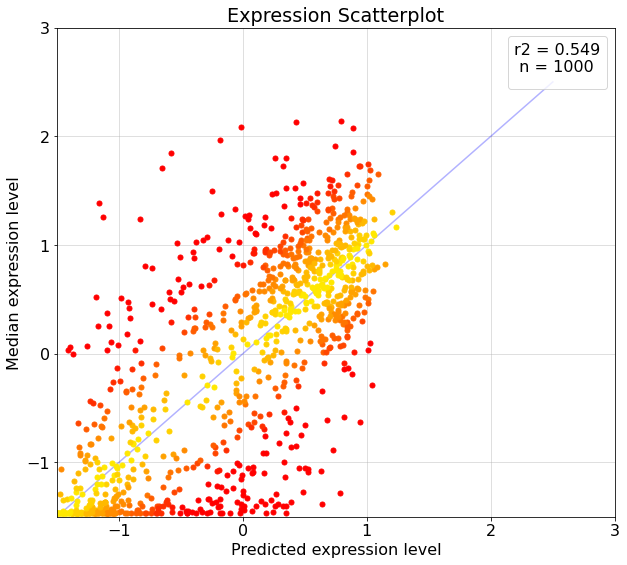

In [13]:
net.plot_r2([X_testpromoter_p], y_test, True)

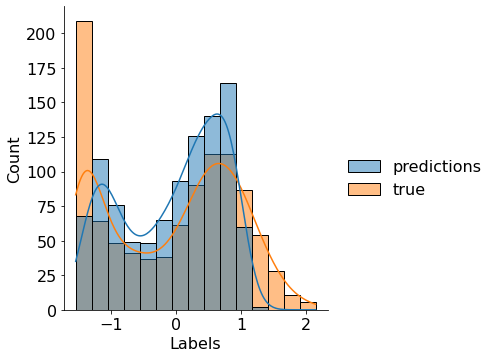

In [14]:
net.plot_kde([X_testpromoter_p], y_test, True)

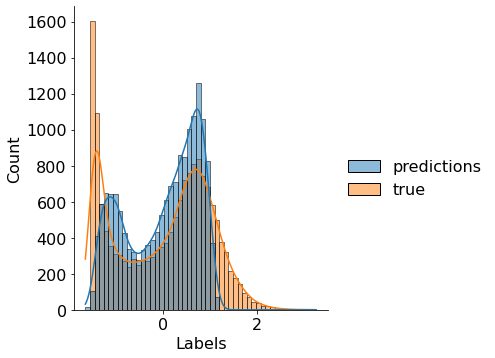

In [15]:
net.plot_kde([X_trainpromoter_p], y_train, True)

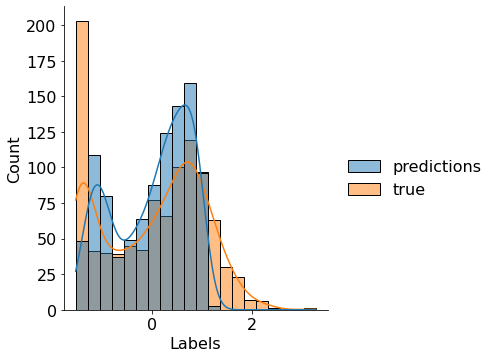

In [16]:
net.plot_kde([X_validationpromoter_p], y_validation, True)